In [1]:
# Setup matplotlib to plot inline (within the notebook)
###
import matplotlib.pyplot as plt
%matplotlib inline
# Import the pyplot module of Matplotlib as plt


# Import pandas under the abbreviation 'pd'
import pandas as pd
# Import NumPy under the abbreviation 'np'
import numpy as np

In [3]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
heart1 = pd.read_csv("../Projects/heart.csv")
heart2 = pd.read_csv("../Projects/heart2.csv")
heart_disease = pd.concat([heart1,heart2], ignore_index =True)

heart_disease.to_csv('heart_disease', index=False)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


<Axes: >

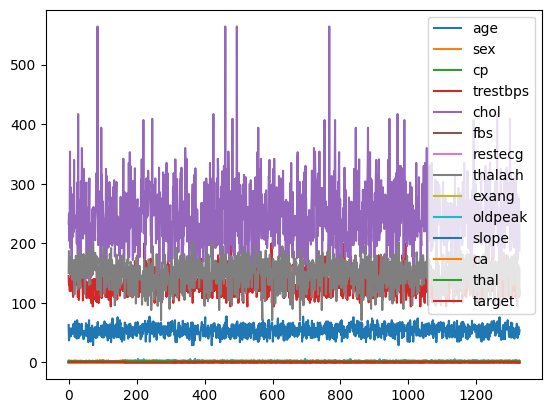

In [7]:
X = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']
heart_disease.plot()

In [8]:
np.random.seed(42)
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split
# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=42)

In [9]:
# View the different shapes of the training and test datasets
X_train.shape , X_test.shape , y_train.shape , y_test.shape
#from above shape of dataset we notice that the test data 15% from the train data that represeant 85%!!

((929, 13), (399, 13), (929,), (399,))

In [10]:
# Import LinearSVC from sklearn's svm module(Supportvectormachine)
from sklearn.svm import LinearSVC #Support Vector machine classifier

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier
# Import SVC from sklearn's svm module
from sklearn.svm import SVC
# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have
from sklearn.ensemble import RandomForestClassifier

In [11]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

In [14]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

c:\Users\user\Desktop\Ai Engineers Program\Projects\MLpractice\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8571428571428571,
 'KNN': 0.7543859649122807,
 'SVC': 0.6766917293233082,
 'LogisticRegression': 0.8395989974937343,
 'RandomForestClassifier': 0.9874686716791979}

<Axes: >

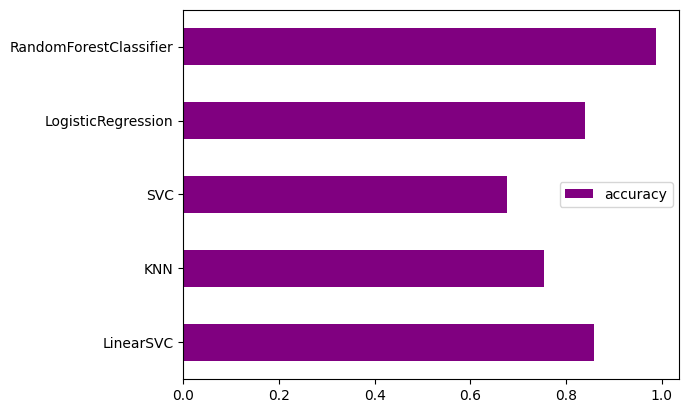

In [16]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot(kind='barh',color='purple')

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1
)

rs_rf.fit(X_train, y_train)
print("Best params:", rs_rf.best_params_)
print("Best score:", rs_rf.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best score: 0.9881604184829991


In [22]:
# Score the instance of RandomizedSearchCV using the test data
rs_rf.best_score_

np.float64(0.9881604184829991)

In [25]:
print(rs_rf.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [27]:
# Instantiate a Randomforest classifier using the best hyperparameters from RandomizedSearchCV
rf = RandomForestClassifier(**rs_rf.best_params_) # the kwargs ** means we mention the dic to be 

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [29]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

y_predict = rf.predict(X_test)

confusion_matrix(y_test, y_predict)

array([[190,   0],
       [  5, 204]])

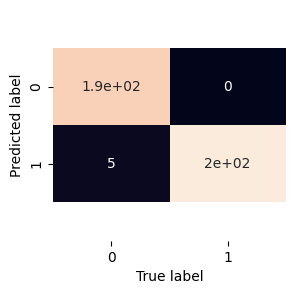

In [33]:
# Create a more visual confusion matrix
import seaborn as sns
# Make confusion matrix more visual
def plot_conf_mat(y_test, y_predict):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predict),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_predict)

In [35]:
# Create a classification report using the classification_report function
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       190
           1       1.00      0.98      0.99       209

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399



In [36]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

# Use the dump function to export the trained model to file تصدير
dump(rf, 'real_heart_disease.joblib')

['real_heart_disease.joblib']

In [37]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_model = load('real_heart_disease.joblib')

# Evaluate the loaded trained model on the test data
print(f'Model score: {rf.score(X_test,y_test)}')
print(f'Loaded model score: {loaded_model.score(X_test,y_test)}')


Model score: 0.9874686716791979
Loaded model score: 0.9874686716791979


In [ ]:
import gradio as gr
import joblib
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

class HeartDiseasePredictorApp:
    def __init__(self):
        """Initialize the predictor"""
        self.load_model()
        self.setup_features()
    
    def load_model(self):
        """Load the trained model"""
        try:
            self.model = joblib.load('real_heart_disease.joblib')
            print("Model loaded successfully!")
        except Exception as e:
            print(f"Error loading model: {e}")
            raise
    
    def setup_features(self):
        """Define features and their ranges"""
        self.features = [
            ("age", gr.Slider(30, 80, value=45, label="Age")),
            ("sex", gr.Radio(["0", "1"], label="Sex (0=Female, 1=Male)", value="0")),
            ("cp", gr.Radio(["0", "1", "2", "3"], label="Chest Pain Type (0-3)", value="0")),
            ("trestbps", gr.Slider(90, 200, value=120, label="Resting Blood Pressure (mm Hg)")),
            ("chol", gr.Slider(100, 600, value=200, label="Cholesterol (mg/dl)")),
            ("fbs", gr.Radio(["0", "1"], label="Fasting Blood Sugar > 120 mg/dl (1=Yes)", value="0")),
            ("restecg", gr.Radio(["0", "1", "2"], label="Resting ECG Results (0-2)", value="0")),
            ("thalach", gr.Slider(60, 220, value=150, label="Maximum Heart Rate")),
            ("exang", gr.Radio(["0", "1"], label="Exercise Induced Angina (1=Yes)", value="0")),
            ("oldpeak", gr.Slider(0, 6.2, value=1.0, label="ST Depression")),
            ("slope", gr.Radio(["0", "1", "2"], label="Slope of Peak Exercise ST Segment", value="0")),
            ("ca", gr.Radio(["0", "1", "2", "3"], label="Number of Major Vessels", value="0")),
            ("thal", gr.Radio(["1", "2", "3"], label="Thalassemia", value="1"))
        ]
    
    def predict(self, *args):
        """Make prediction and return results"""
        try:
            # Convert inputs to numeric array
            features = np.array([float(x) for x in args]).reshape(1, -1)
            
            # Get prediction probability
            probability = self.model.predict_proba(features)[0][1]
            
            # Determine risk level and color
            if probability < 0.3:
                risk_level = "Low Risk 🟢"
                risk_color = "#4CAF50"  # Green
            elif probability < 0.7:
                risk_level = "Moderate Risk 🟡"
                risk_color = "#FFC107"  # Amber
            else:
                risk_level = "High Risk 🔴"
                risk_color = "#F44336"  # Red
            
            # Generate recommendations
            recommendations = self.get_recommendations(args, probability)
            
            # Create visual results with both designs
            visual_result = f"""
            <div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;">
                <!-- Original Vertical Progress Bar -->
                <div style="flex: 1; min-width: 300px; text-align: center; font-family: Arial, sans-serif; padding: 20px; border-radius: 10px; background: #f9f9f9; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
                    <h2 style="color: {risk_color}; margin-bottom: 20px;">{risk_level}</h2>
                    <div style="position: relative; width: 100%; height: 300px; background: linear-gradient(to top, #4CAF50, #FFC107, #F44336); border-radius: 10px; overflow: hidden;">
                        <div style="position: absolute; bottom: 0; left: 0; right: 0; height: {probability * 100}%; background: {risk_color}; transition: height 0.5s ease;"></div>
                        <div style="position: absolute; bottom: {probability * 100}%; left: 50%; transform: translateX(-50%); width: 100%; text-align: center;">
                            <div style="font-size: 24px; font-weight: bold; color: {risk_color}; background: rgba(255, 255, 255, 0.8); padding: 5px 10px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);">
                                {probability * 100:.1f}%
                            </div>
                        </div>
                    </div>
                    <div style="display: flex; justify-content: space-between; margin-top: 20px; font-size: 14px; color: #666;">
                        <span>0%</span>
                        <span>50%</span>
                        <span>100%</span>
                    </div>
                </div>

                <!-- New Donut Chart Design -->
                <div style="flex: 1; min-width: 300px; text-align: center; font-family: Arial, sans-serif; padding: 20px; border-radius: 10px; background: #f9f9f9; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">
                    <h2 style="color: {risk_color}; margin-bottom: 20px;">{risk_level}</h2>
                    <div style="position: relative; width: 250px; height: 250px; margin: 0 auto;">
                        <!-- Background circle -->
                        <svg viewBox="0 0 36 36" style="width: 100%; height: 100%; transform: rotate(-90deg);">
                            <path d="M18 2.0845
                                a 15.9155 15.9155 0 0 1 0 31.831
                                a 15.9155 15.9155 0 0 1 0 -31.831"
                                fill="none"
                                stroke="#eee"
                                stroke-width="3"
                                stroke-linecap="round" />
                            
                            <!-- Foreground circle -->
                            <path d="M18 2.0845
                                a 15.9155 15.9155 0 0 1 0 31.831
                                a 15.9155 15.9155 0 0 1 0 -31.831"
                                fill="none"
                                stroke="{risk_color}"
                                stroke-width="3"
                                stroke-linecap="round"
                                stroke-dasharray="{probability * 100}, 100" />
                        </svg>
                        <!-- Center text -->
                        <div style="position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); text-align: center;">
                            <div style="font-size: 36px; font-weight: bold; color: {risk_color};">
                                {probability * 100:.1f}%
                            </div>
                            <div style="font-size: 16px; color: #666;">Risk Level</div>
                        </div>
                    </div>
                    <div style="margin-top: 20px; padding: 10px; background: {risk_color}; color: white; border-radius: 5px;">
                        {risk_level}
                    </div>
                </div>
            </div>
            """
            
            return (
                visual_result,
                "\n".join(recommendations)
            )
            
        except Exception as e:
            print(f"Prediction error: {e}")
            return (
                "Error in prediction",
                f"An error occurred: {str(e)}"
            )
    
    def get_recommendations(self, inputs, risk_prob):
        """Generate health recommendations based on inputs"""
        recommendations = []
        
        # Convert inputs to more readable format
        age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal = [float(x) for x in inputs]
        
        # Add recommendations based on risk level
        if risk_prob > 0.7:
            recommendations.append("⚠️ URGENT: Schedule an appointment with a cardiologist immediately")
        elif risk_prob > 0.3:
            recommendations.append("⚠️ Schedule a check-up with your healthcare provider soon")
        
        # Add specific recommendations based on values
        if trestbps > 140:
            recommendations.append("🩺 Your blood pressure is elevated. Consider:")
            recommendations.append("   - Regular blood pressure monitoring")
            recommendations.append("   - Reducing salt intake")
            recommendations.append("   - Regular exercise (after consulting your doctor)")
        
        if chol > 200:
            recommendations.append("🩺 Your cholesterol is elevated. Consider:")
            recommendations.append("   - Getting a detailed lipid panel")
            recommendations.append("   - Dietary modifications")
            recommendations.append("   - Consulting a nutritionist")
        
        if fbs == 1:
            recommendations.append("🩺 Your fasting blood sugar is high. Consider:")
            recommendations.append("   - Regular blood sugar monitoring")
            recommendations.append("   - Dietary changes")
            recommendations.append("   - Consulting an endocrinologist")
        
        if exang == 1:
            recommendations.append("🩺 You have exercise-induced angina:")
            recommendations.append("   - Keep a log of angina episodes")
            recommendations.append("   - Discuss exercise limits with your doctor")
        
        # Add general recommendations
        recommendations.extend([
            "\n📌 General Recommendations:",
            "   - Maintain a heart-healthy diet",
            "   - Regular physical activity (as approved by your doctor)",
            "   - Manage stress through relaxation techniques",
            "   - Ensure 7-8 hours of quality sleep",
            "   - Regular health check-ups"
        ])
        
        return recommendations

    def create_interface(self):
        """Create and return Gradio interface"""
        inputs = [feat[1] for feat in self.features]
        outputs = [
            gr.HTML(label="Risk Assessment"),
            gr.Textbox(label="Recommendations", lines=12)
        ]
        
        return gr.Interface(
            fn=self.predict,
            inputs=inputs,
            outputs=outputs,
            title="❤️ Heart Disease Risk Prediction",
            description="""This tool predicts your risk of heart disease based on various health parameters.
            Fill in all fields below to get your personalized risk assessment and recommendations.
            
            Note: This is a screening tool only and should not replace professional medical advice.""",
            theme=gr.themes.Soft(),
            allow_flagging="never"
        )

def main():
    """Main function to run the application"""
    try:
        print("Starting Heart Disease Predictor...")
        app = HeartDiseasePredictorApp()
        interface = app.create_interface()
        
        # Try different port ranges
        port_ranges = [
            range(7860, 7870),  # First try Gradio's default range
            range(8000, 8100),  # Then try common alternative ports
            range(3000, 3100)   # Finally try another common range
        ]
        
        print("Attempting to launch interface...")
        
        for port_range in port_ranges:
            try:
                # Try a random port from the current range
                port = random.choice(list(port_range))
                print(f"Trying port {port}...")
                
                interface.launch(
                    server_port=port,
                    show_error=True,
                    debug=True,
                    share=True
                )
                print(f"Successfully launched on port {port}")
                break
                
            except Exception as e:
                print(f"Failed to launch on port {port}: {e}")
                continue
        else:
            # If all port ranges fail, try launching without a specific port
            print("Trying to launch without specific port...")
            interface.launch(
                server_port=None,  # Let Gradio choose any available port
                show_error=True,
                debug=True,
                share=True
            )
            
    except Exception as e:
        print(f"Application failed to start: {e}")
        print("Trying one last time with minimal configuration...")
        try:
            interface.launch()
        except Exception as final_e:
            print(f"Final attempt failed: {final_e}")

if __name__ == "__main__":
    # Set random seed for reproducibility 69,1,2,140,254,0,0,146,0,2,1,3,3,0


    random.seed()
    main()



c:\Users\user\Desktop\Ai Engineers Program\Projects\MLpractice\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Starting Heart Disease Predictor...
Model loaded successfully!
Attempting to launch interface...
Trying port 7862...
* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Keyboard interruption in main thread... closing server.
Successfully launched on port 7862
